# **Assignment - 1**

## **2. Students Performance Data Visualizations**

Importing Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

**Ingestion & Preprocessing**

In [89]:
df2 = pd.read_csv("/content/Question 2/data_raw/StudentsPerformance.csv")
df2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [90]:
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None

In [91]:
df2.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [92]:
df2 = df2.dropna()


In [93]:
df2["overall_avg"] = df2[["math score", "reading score", "writing score"]].mean(axis=1)
df2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_avg
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [94]:
df2.columns = df2.columns.str.replace(" ", "_")
df2.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_avg
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


## **Visualization Settings**

In [95]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(2.67, 2.0), dpi=300) # 800×600 px this px is converted to inches

<Figure size 801x600 with 0 Axes>

<Figure size 801x600 with 0 Axes>

**Visualization 1:  Gender boxplots (math vs reading)**

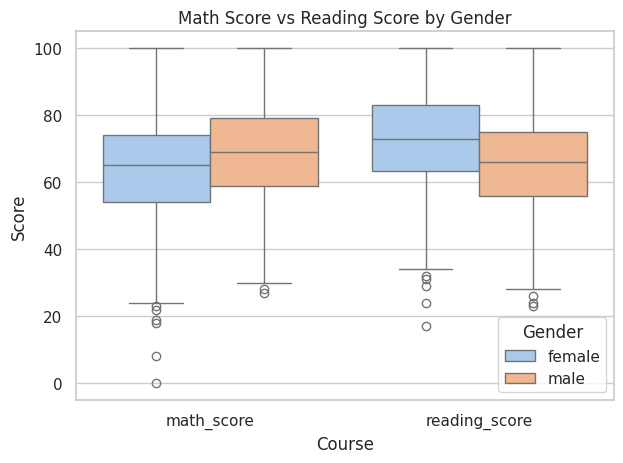

In [96]:
sns.boxplot(
    data=df2.melt(id_vars="gender",
                  value_vars=["math_score","reading_score"]),
    x="variable",
    y="value",
    hue="gender"
)

plt.title("Math Score vs Reading Score by Gender")
plt.xlabel("Course")
plt.ylabel("Score")
plt.legend(title="Gender")
plt.tight_layout()
plt.savefig("/content/Question 2/results/V1_Gender_boxplots.png")
plt.show()

**Interpretation on V1:**

The above chart describes the math scores and reading scores grouped by gender side by side. From the above chart we can say that, there are noticeable gender differences between math and reading scores. In math, male students show a slightly higher median score compared to female students. In reading, female students outperform male students. Also we can say that the reading scores have high difference than the math score differences. Overall, males perform slightly better in math, whereas females perform better in reading.

**Visualization 2: Test prep impact on math**

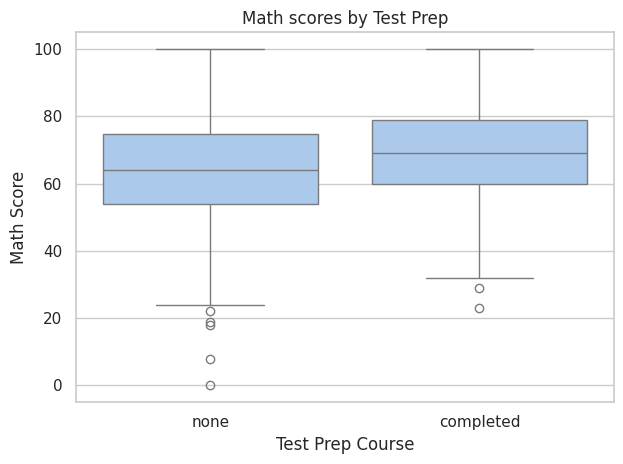

In [97]:
sns.boxplot(
    x="test_preparation_course",
    y="math_score",
    data=df2
)

plt.title("Math scores by Test Prep")
plt.xlabel("Test Prep Course")
plt.ylabel("Math Score")
plt.tight_layout()
plt.savefig("/content/Question 2/results/V2_Testprep_math.png")
plt.show()

**Interpretation on V2:**

I choose the box plot here. From the above box plot we can say that students who completed the test prep course have scored higher in math. The median math score for the completed group is clearly above the median for students who did not complete the course.The entire destribution of the completed group is upward. Even though there is overlap between the two groups, the central tendancy favour students who completed prepatation. Meaning who completed the test preparation helped to score higher in math course. Students without preparation display more lower end outliers including very low scores.

**Visualization 3: Lunch Type and average performace**

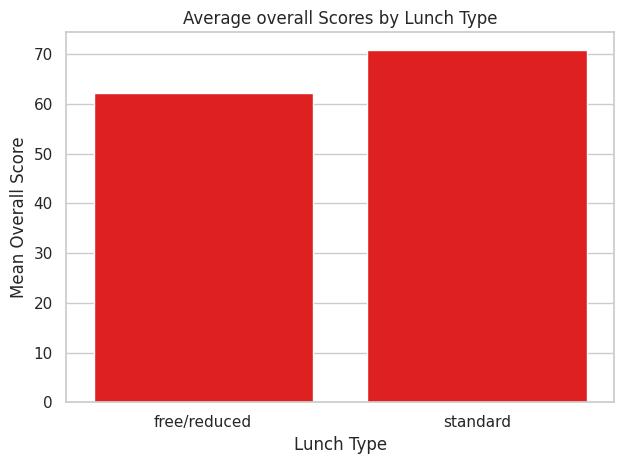

In [98]:
mean_scores = df2.groupby("lunch")["overall_avg"].mean().reset_index()

sns.barplot(
    x="lunch",
    y="overall_avg",
    data=mean_scores,
    color ="red"
)

plt.title("Average overall Scores by Lunch Type")
plt.xlabel("Lunch Type")
plt.ylabel("Mean Overall Score")
plt.tight_layout()
plt.savefig("/content/Question 2/results/V3_Lunch_avg.png")
plt.show()

**Interpretation on V3:**

Above is the bar chat shows that students with standard lunch have am average score around 70, while students with free/reduced lunch average is around 62. This represents a meaningful gap in overall performace. The difference is clearly visible between 2 bars. The higher mean for standard lunch suggest better overall academic performace accorss subjects. The above visual representation tells the differences that may be linkedin to economical background. Overall, lunch type is associated with differences in academic achievement.

**Visualization 4: Subject Correlations**

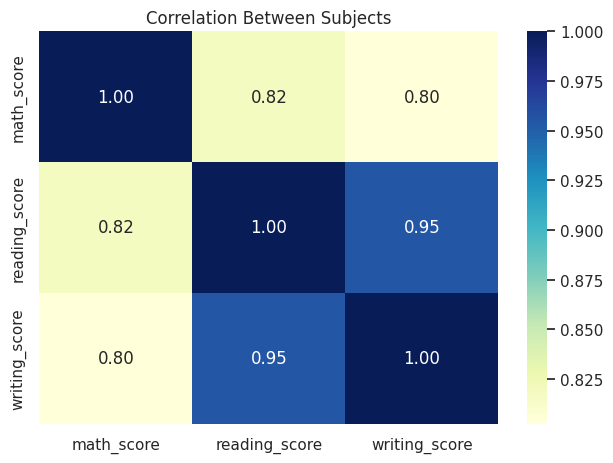

In [99]:
corr = df2[["math_score",
            "reading_score",
            "writing_score"]].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="YlGnBu",
    fmt=".2f"
)

plt.title("Correlation Between Subjects")
plt.tight_layout()
plt.savefig("/content/Question 2/results/V4_Correlation_heatmap.png")
plt.show()

**Interpretation on V4:**

The 3 subjects show very strong positive relationshipts with each other. Reading adn writing have the highest correlation- 0.95, indicating an extremely string linear association. Math is also strongly correlated with reading (0.82). All correlation values are above 0.80, confirming strong academic overlap accross subjects. In the above heatmap with darker shading highlighting the strongest relationships. Overall, students who perform well in one subject are highly likely to perform well in the other subjects too.


**Visualization 5: Math vs reading with trend lines by test prep**

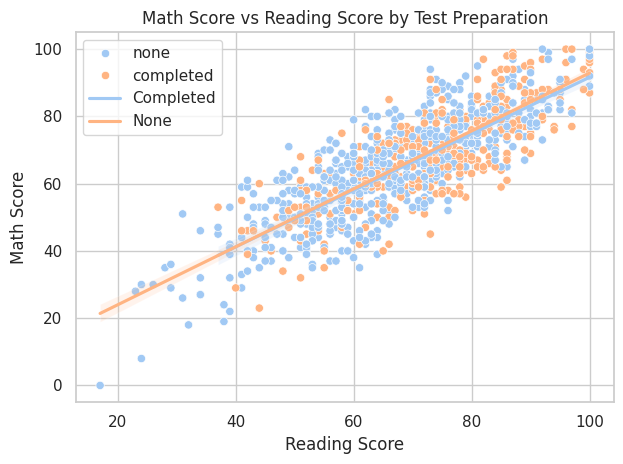

In [100]:
sns.scatterplot(
    x="reading_score",
    y="math_score",
    hue="test_preparation_course",
    data=df2
)

# Regression line — completed
sns.regplot(
    x="reading_score",
    y="math_score",
    data=df2[df2["test_preparation_course"]=="completed"],
    scatter=False,
    label="Completed"
)

# Regression line — none
sns.regplot(
    x="reading_score",
    y="math_score",
    data=df2[df2["test_preparation_course"]=="none"],
    scatter=False,
    label="None"
)

plt.title("Math Score vs Reading Score by Test Preparation")
plt.xlabel("Reading Score")
plt.ylabel("Math Score")
plt.legend()
plt.tight_layout()
plt.savefig("/content/Question 2/results/V5_Scatter_trend.png")
plt.show()

**Interpretation on V5:**

Math and reading scores show a strong positive linear relationship across both groups. As reading scores increase, math scores also increases consistently. Students who completed the test prep course generally appear in the higher score ranges. Both regression lines show a clear upward slope, confirming strong relationship. The slope for the completed group appears slightly steeper, suggesting stronger performace gains. Overall, reading performace is a strong predictor of math persormace regardless of preparation status, though test preparation is linked with higher overall achievement.


In [101]:
import shutil
shutil.make_archive("Question 2", "zip", "/content/Question 2")

'/content/Question 2.zip'